<a href="https://colab.research.google.com/github/henrique-furtado47/Algoritmos-python/blob/main/POO_II_Atividade_Pratica_1_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1

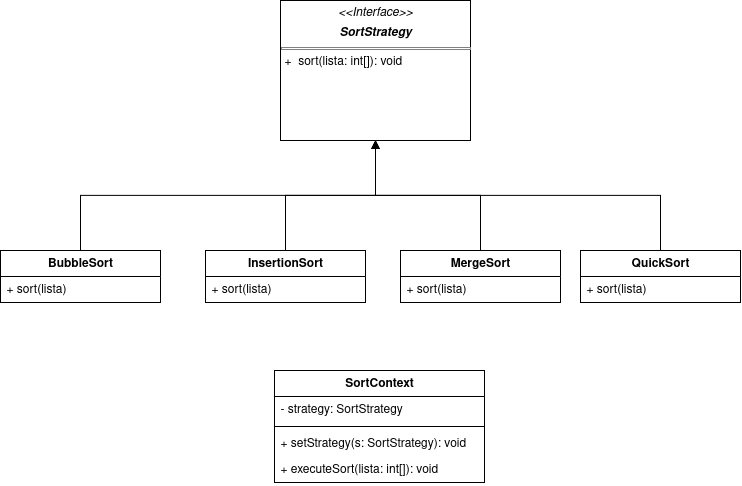

2

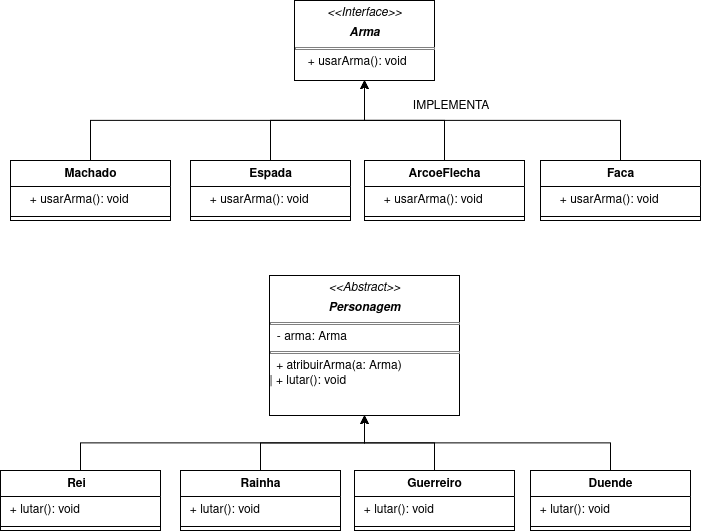

3

In [11]:
from abc import ABC, abstractmethod

class Arma(ABC):
    @abstractmethod
    def usar_arma(self):
        pass


In [12]:
class Machado(Arma):
    def usar_arma(self):
        print("Golpeando com o machado!")

class ArcoEFlexa(Arma):
    def usar_arma(self):
        print("Atirando flecha com arco!")

class Espada(Arma):
    def usar_arma(self):
        print("Atacando com espada!")

class Faca(Arma):
    def usar_arma(self):
        print("Golpeando com a faca!")


In [13]:
class Personagem(ABC):
    def __init__(self, arma: Arma):
        self.arma = arma

    def atribui_arma(self, arma: Arma):
        self.arma = arma

    @abstractmethod
    def lutar(self):
        pass


In [14]:
class Personagem(ABC):
    def __init__(self, arma: Arma):
        self.arma = arma

    def atribui_arma(self, arma: Arma):
        self.arma = arma

    @abstractmethod
    def lutar(self):
        pass


In [15]:
class Rei(Personagem):
    def lutar(self):
        print("O Rei entra em combate!")
        self.arma.usar_arma()

class Rainha(Personagem):
    def lutar(self):
        print("A Rainha se prepara para a batalha!")
        self.arma.usar_arma()

class Guerreiro(Personagem):
    def lutar(self):
        print("O Guerreiro ataca!")
        self.arma.usar_arma()

class Duende(Personagem):
    def lutar(self):
        print("O Duende avança sorrateiramente!")
        self.arma.usar_arma()


In [16]:
if __name__ == "__main__":
    # Criando personagens com diferentes armas
    rei = Rei(Espada())
    rainha = Rainha(ArcoEFlexa())
    guerreiro = Guerreiro(Machado())
    duende = Duende(Faca())

    # Lutando com armas iniciais
    rei.lutar()
    rainha.lutar()
    guerreiro.lutar()
    duende.lutar()

    print("\n-- Mudando as armas durante o jogo --\n")

    # Mudando estratégias de arma em tempo de execução
    rei.atribui_arma(Machado())
    rainha.atribui_arma(Faca())

    rei.lutar()
    rainha.lutar()


O Rei entra em combate!
Atacando com espada!
A Rainha se prepara para a batalha!
Atirando flecha com arco!
O Guerreiro ataca!
Golpeando com o machado!
O Duende avança sorrateiramente!
Golpeando com a faca!

-- Mudando as armas durante o jogo --

O Rei entra em combate!
Golpeando com o machado!
A Rainha se prepara para a batalha!
Golpeando com a faca!
